In [121]:
# %pip install xgboost imblearn

In [122]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.xgboost import XGBclassifier 
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report 

In [123]:
df = pd.read_csv('F:\DS\Projects\customer_churn_prediction\data\external\WA_Fn-UseC_-Telco-Customer-Churn.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Track Computers\AppData\Local\Temp\ipykernel_9740\2701735521.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('F:\DS\Projects\customer_churn_prediction\data\external\WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [124]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [126]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [127]:
pd.set_option('display.max_columns' ,None)

In [128]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [129]:
df = df.drop(columns = ['customerID'])

In [130]:


for col in df.columns:
    print(col , df[col].unique())
    print("---")

gender ['Female' 'Male']
---
SeniorCitizen [0 1]
---
Partner ['Yes' 'No']
---
Dependents ['No' 'Yes']
---
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
---
PhoneService ['No' 'Yes']
---
MultipleLines ['No phone service' 'No' 'Yes']
---
InternetService ['DSL' 'Fiber optic' 'No']
---
OnlineSecurity ['No' 'Yes' 'No internet service']
---
OnlineBackup ['Yes' 'No' 'No internet service']
---
DeviceProtection ['No' 'Yes' 'No internet service']
---
TechSupport ['No' 'Yes' 'No internet service']
---
StreamingTV ['No' 'Yes' 'No internet service']
---
StreamingMovies ['No' 'Yes' 'No internet service']
---
Contract ['Month-to-month' 'One year' 'Two year']
---
PaperlessBilling ['Yes' 'No']
---
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
---
MonthlyCharges [

In [131]:
# Filtered the dataFrame 
# where it is Empty
df[df['TotalCharges'] == " "]

len(df[df['TotalCharges'] == " "])
#Rason for empty could be Customer have not used the service 

11

In [132]:
df['TotalCharges'] = df['TotalCharges'].replace([" "  , "0.0"])

C:\Users\Track Computers\AppData\Local\Temp\ipykernel_9740\1165684077.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['TotalCharges'] = df['TotalCharges'].replace([" "  , "0.0"])


In [133]:
# Converting Monthly charges 
df['TotalCharges']= df['TotalCharges'].astype(float)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [135]:
df['Churn'].value_counts()
# Imbalance DataSet

Churn
No     5174
Yes    1869
Name: count, dtype: int64

- EDA

In [136]:
# Separate categorical and numerical features
# categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [137]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2285.169963
std,0.368612,24.559481,30.090047,2267.544511
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.675000
50%,0.000000,29.000000,70.350000,1398.250000
75%,0.000000,55.000000,89.850000,3803.050000
max,1.000000,72.000000,118.750000,8684.800000


In [138]:
def distribution(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    # Calculate the mean and median values for the column
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # Add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")

    plt.legend()
    plt.show()


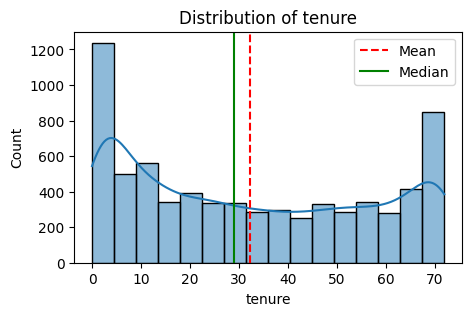

In [139]:
distribution(df,'tenure')

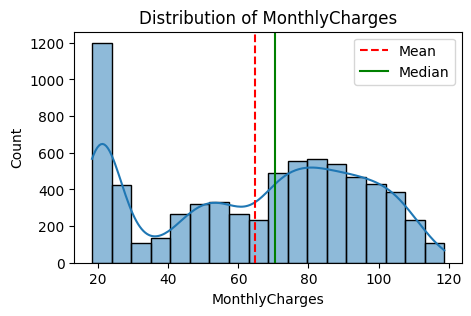

In [140]:
distribution(df,'MonthlyCharges')

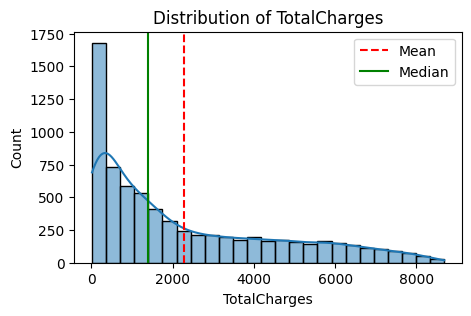

In [141]:
distribution(df,'TotalCharges')

In [142]:
def boxplt(df , column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f'Distribution :{column_name}')
    plt.ylabel(column_name)
    plt.show()

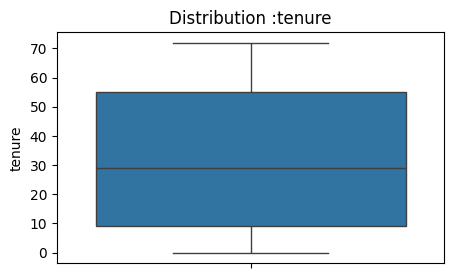

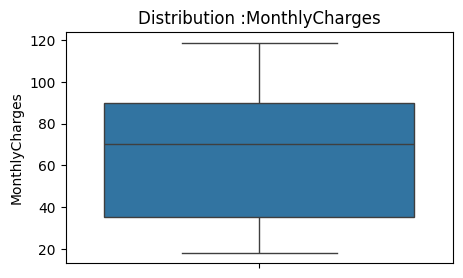

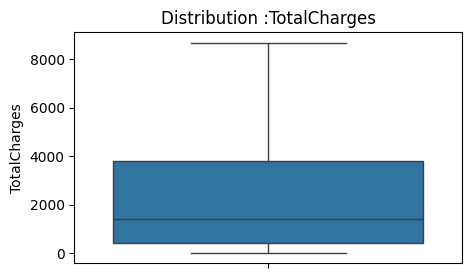

In [143]:
boxplt(df,'tenure')
boxplt(df,'MonthlyCharges')
boxplt(df,'TotalCharges')

<Axes: >

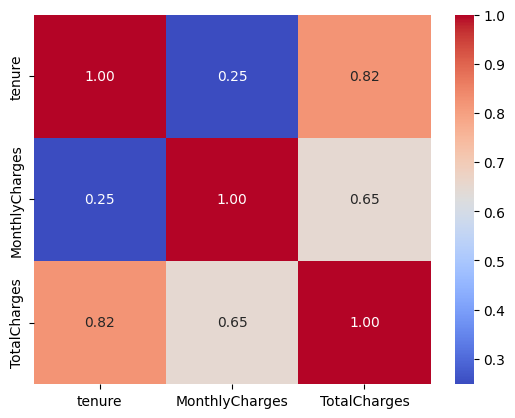

In [144]:
sns.heatmap(df[['tenure' , 'MonthlyCharges', 'TotalCharges']].corr(), annot= True ,cmap='coolwarm' ,fmt='.2f')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [146]:
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_features =  ['SeniorCitizen'] + cat_features 
cat_features


['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

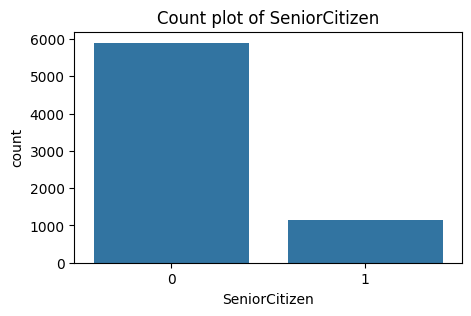

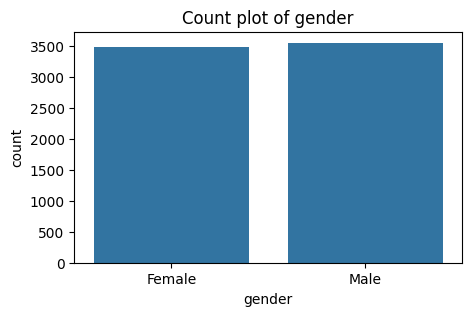

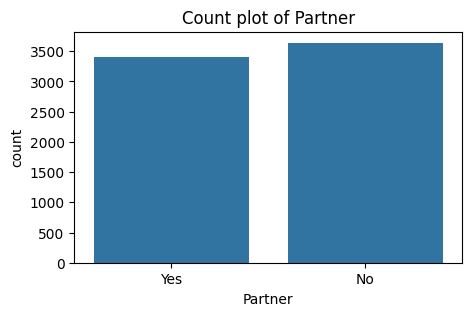

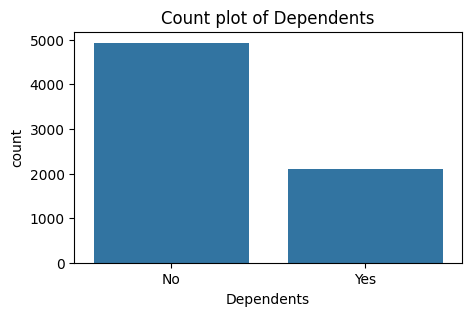

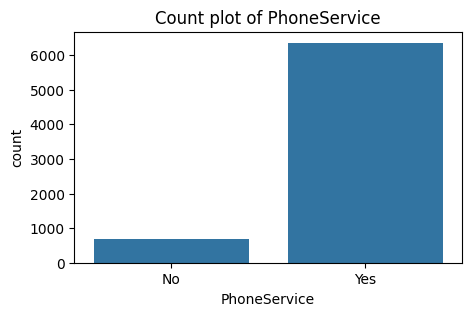

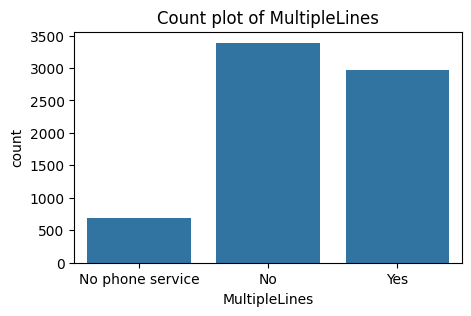

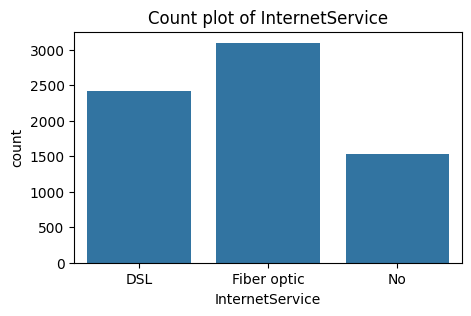

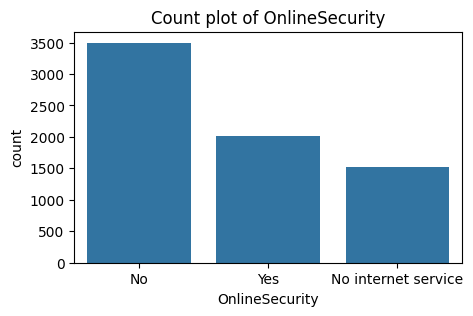

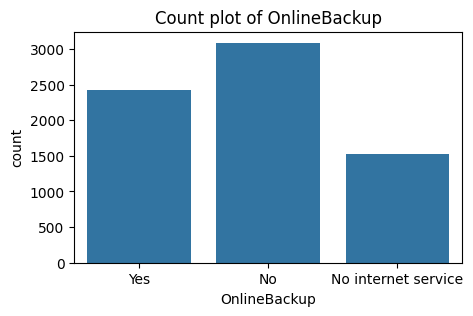

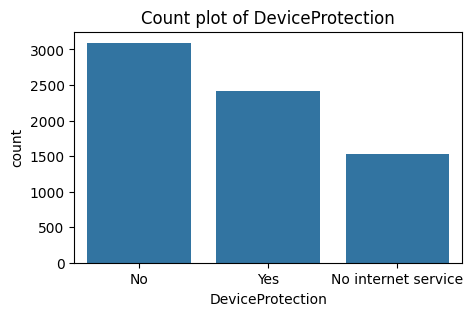

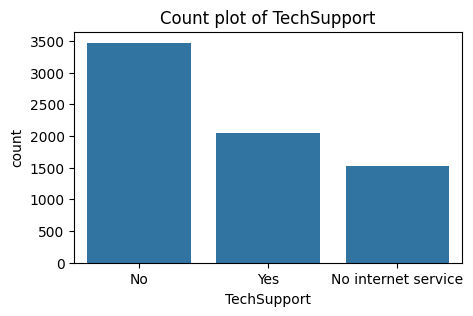

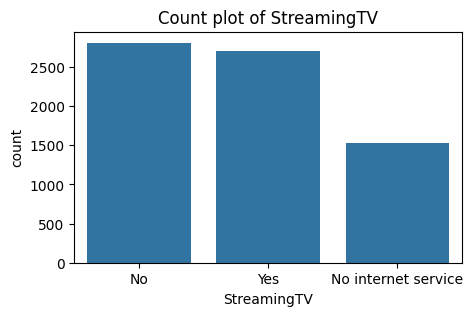

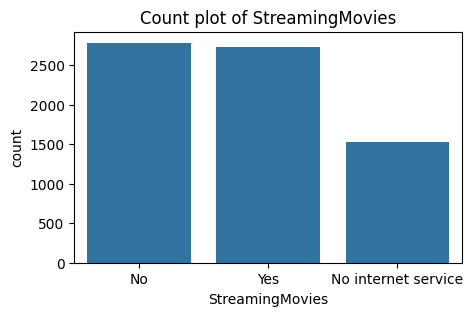

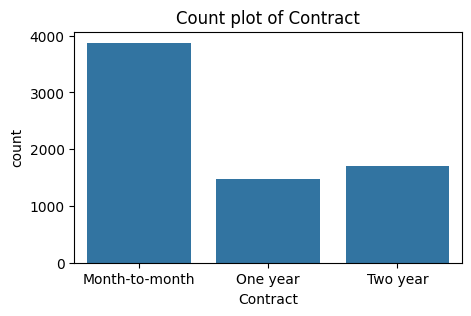

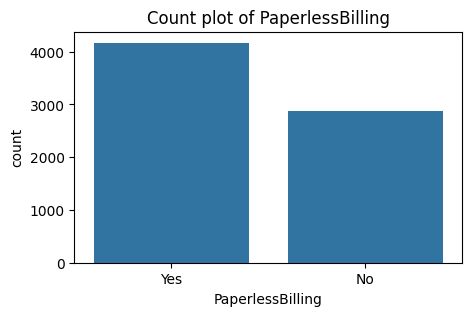

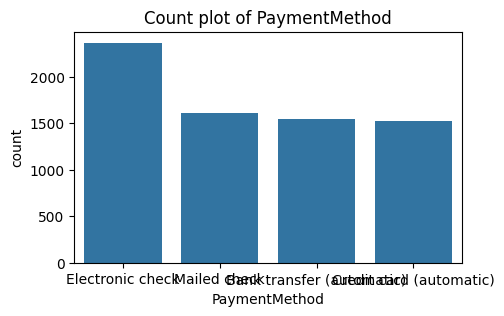

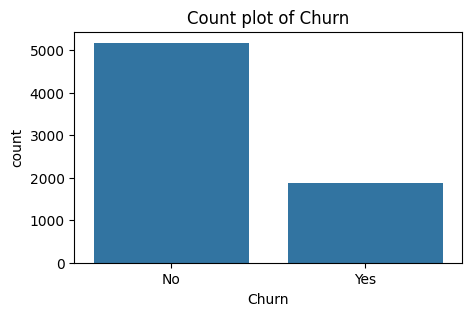

In [147]:
for col in cat_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f'Count plot of {col}')

    # Seems Imbalance 

- Data Preprocessing 

In [148]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [149]:
df['Churn'] = df['Churn'].replace({'Yes': 1 , 'No': 0})


C:\Users\Track Computers\AppData\Local\Temp\ipykernel_9740\2896312178.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1 , 'No': 0})


In [150]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [151]:
obj_features = df.select_dtypes(include=['object', 'category']).columns.tolist()




In [152]:
# Applyin Encoding on Categorical Columns 
import pickle

encoders = {}

for col in obj_features:
    Label_encoder = LabelEncoder()
    df[col]= Label_encoder.fit_transform(df[col])
    encoders[col] = Label_encoder

# saving ENcoding  
# For When the new data will come it will first change to the Encoding values

with open('encoder.pkl' , 'wb') as file:
    pickle.dump(encoders, file)

In [153]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [154]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [155]:
x = df.drop(columns=['Churn'])
y = df['Churn']
# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(y_train.value_counts())


Churn
0    4138
1    1496
Name: count, dtype: int64


In [156]:
# Apply SMOTE (UPSAMPLING)
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X_train, y_train)


In [157]:
print(y_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [158]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
    }

# dictionary to store the cross-validation results
cv_scores = {}
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    # Change this LINE 
    # scores = cross_val_score(model, x_smote, y_smote, cv=skf, scoring="accuracy")
    scores = cross_val_score(model, x_smote, y_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy:{np.mean(scores):.2f}")
    print('='*60)


Training Decision Tree with default parameters
Decision Tree cross-validation accuracy:0.78
Training Random Forest with default parameters
Random Forest cross-validation accuracy:0.84


In [159]:
# Accuracies in the Different Folds 
cv_scores


{'Decision Tree': array([0.68055556, 0.71540785, 0.81812689, 0.83564955, 0.84169184]),
 'Random Forest': array([0.72403382, 0.77280967, 0.90392749, 0.89546828, 0.89909366])}

In [160]:
# Going with RandomForest 
rfc = RandomForestClassifier(random_state=42)

In [161]:
rfc.fit(x_smote,y_smote)

RandomForestClassifier(random_state=42)

In [162]:
y_test_pred = rfc.predict(X_test)

print(f"Accuracy Score: ", accuracy_score(y_test,y_test_pred))
print(f"Confusion Matrix: ", confusion_matrix(y_test,y_test_pred))
print(f"Classification Report: ", classification_report(y_test,y_test_pred))

Accuracy Score:  0.7814052519517388
Confusion Matrix:  [[881 155]
 [153 220]]
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [163]:
model_data = {'model': rfc ,'feature_names' : x.columns.tolist()}

with open('churn_model.pkl', 'wb') as file:
    pickle.dump(model_data,file)



Loading THe same Modle and the Encoders , and predicting the Model 

In [164]:


with open('churn_model.pkl', 'rb') as file:
    model_data = pickle.load(file)

loaded_model = model_data['model']
feature_names =  model_data['feature_names']

In [165]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [166]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [169]:
import pandas as pd
import pickle

# Input data
input_data = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'Yes',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# Convert input data into DataFrame
input_data_df = pd.DataFrame([input_data])

# Load the encoder pickle file
with open("encoder.pkl", "rb") as f:
    encoders = pickle.load(f)

# Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:  # Only apply encoder if the column exists
        if hasattr(encoder, 'transform'):
            # Check if the category exists in the encoder's classes_ list before applying the transformation
            if isinstance(encoder, pickle._Unpickler) and hasattr(encoder, 'classes_'):
                if input_data_df[column].iloc[0] not in encoder.classes_:
                    # Fallback for unseen category
                    print(f"Warning: The value {input_data_df[column].iloc[0]} is not in the encoder's classes for {column}")
                else:
                    input_data_df[column] = encoder.transform(input_data_df[column])
            else:
                input_data_df[column] = encoder.transform(input_data_df[column])

# Check the transformed data
# print(input_data_df)

# Assuming `loaded_model` is already loaded (load it similarly as encoders)
# Make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# Results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")


[0]
Prediction: No Churn
Prediction Probability: [[0.55 0.45]]
